In [1]:
import pandas as pd
import random

In [2]:
linha_interesse = pd.read_csv('linha_6913-10.csv', index_col=0)
linha_interesse['DATA_GPS'] = pd.to_datetime(linha_interesse['DATA_GPS'])

linha_interesse

,DATA_GPS,COD_LINHA,LAT,LONG,COD_ONIBUS,SENTIDO,ID_LINHA,SENTI_QUALI
0,2013-06-01 03:59:59,1465,-23.755630,-46.692027,11644,1.0,6913-10,CENTRO/BAIRRO
1,2013-06-01 04:00:04,1465,-23.768447,-46.716032,11696,1.0,6913-10,CENTRO/BAIRRO
2,2013-06-01 04:00:05,1465,-23.755617,-46.691827,11602,1.0,6913-10,CENTRO/BAIRRO
3,2013-06-01 04:00:05,1465,-23.754227,-46.690552,11760,1.0,6913-10,CENTRO/BAIRRO
4,2013-06-01 04:00:05,34233,-23.755567,-46.691840,11748,2.0,6913-10,BAIRRO/CENTRO
...,...,...,...,...,...,...,...,...
50911,2013-06-02 03:59:49,1465,-23.755663,-46.691485,11580,1.0,6913-10,CENTRO/BAIRRO
50912,2013-06-02 03:59:52,34233,-23.754330,-46.691127,11546,2.0,6913-10,BAIRRO/CENTRO
50913,2013-06-02 03:59:52,1465,-23.755652,-46.691392,11567,1.0,6913-10,CENTRO/BAIRRO
50914,2013-06-02 03:59:52,1465,-23.754510,-46.691242,11624,1.0,6913-10,CENTRO/BAIRRO


In [3]:
linha_interesse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50916 entries, 0 to 50915
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATA_GPS     50916 non-null  datetime64[ns]
 1   COD_LINHA    50916 non-null  int64         
 2   LAT          50916 non-null  float64       
 3   LONG         50916 non-null  float64       
 4   COD_ONIBUS   50916 non-null  int64         
 5   SENTIDO      50916 non-null  float64       
 6   ID_LINHA     50916 non-null  object        
 7   SENTI_QUALI  50916 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 3.5+ MB


In [4]:
cent_bair = linha_interesse[linha_interesse['SENTIDO'] == 1.0].reset_index(drop=True)
bair_cent = linha_interesse[linha_interesse['SENTIDO'] == 2.0].reset_index(drop=True)
bair_cent.head()

,DATA_GPS,COD_LINHA,LAT,LONG,COD_ONIBUS,SENTIDO,ID_LINHA,SENTI_QUALI
0,2013-06-01 04:00:05,34233,-23.755567,-46.691840,11748,2.0,6913-10,BAIRRO/CENTRO
1,2013-06-01 04:00:14,34233,-23.754388,-46.691098,11262,2.0,6913-10,BAIRRO/CENTRO
2,2013-06-01 04:00:18,34233,-23.755480,-46.691760,11738,2.0,6913-10,BAIRRO/CENTRO
3,2013-06-01 04:00:20,34233,-23.755668,-46.691417,11323,2.0,6913-10,BAIRRO/CENTRO
4,2013-06-01 04:00:22,34233,-23.768255,-46.716262,11582,2.0,6913-10,BAIRRO/CENTRO


In [5]:
print('max', max(bair_cent['DATA_GPS']) , 'min', min(bair_cent['DATA_GPS']))

max 2013-06-02 03:59:55 min 2013-06-01 03:34:24


In [6]:
set(bair_cent['DATA_GPS'].dt.day)

{1, 2}

In [7]:
set(bair_cent['DATA_GPS'].dt.month)

{6}

In [14]:
linha_interesse.COD_ONIBUS.value_counts()[20:]

11567    1056
47555    1011
11677    1011
11562     889
11746     867
         ... 
11545      26
11768      24
11436      21
11520      16
11407       1
Name: COD_ONIBUS, Length: 73, dtype: int64

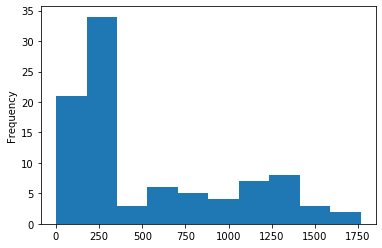

In [11]:
linha_interesse.COD_ONIBUS.value_counts().plot(kind='hist');

In [9]:
for bus in set(linha_interesse['COD_ONIBUS'][:10]):
    busss = linha_interesse[linha_interesse['COD_ONIBUS'] == bus]
    print(bus,'\t', min(busss['DATA_GPS']),'\t', max(busss['DATA_GPS']))

11777 	 2013-06-01 04:00:07 	 2013-06-02 03:56:05
11748 	 2013-06-01 04:00:05 	 2013-06-02 03:57:21
11782 	 2013-06-01 04:00:13 	 2013-06-02 03:59:30
11696 	 2013-06-01 04:00:04 	 2013-06-02 03:59:12
11760 	 2013-06-01 04:00:05 	 2013-06-02 03:59:26
11602 	 2013-06-01 04:00:05 	 2013-06-02 03:56:04
11312 	 2013-06-01 04:00:14 	 2013-06-02 03:59:35
11644 	 2013-06-01 03:59:59 	 2013-06-02 03:59:05


In [10]:
linha_interesse[linha_interesse['DATA_GPS'].dt.month < 6]

,DATA_GPS,COD_LINHA,LAT,LONG,COD_ONIBUS,SENTIDO,ID_LINHA,SENTI_QUALI
2132,2013-05-31 15:35:49,1465,-23.755610,-46.692012,11792,1.0,6913-10,CENTRO/BAIRRO
2134,2013-05-31 15:09:13,1465,-23.755610,-46.692012,11792,1.0,6913-10,CENTRO/BAIRRO
10503,2013-05-29 22:38:19,1465,-23.753045,-46.690810,11436,1.0,6913-10,CENTRO/BAIRRO
22059,2013-05-28 22:19:29,1465,-23.753007,-46.690225,11307,1.0,6913-10,CENTRO/BAIRRO
22269,2013-05-28 22:23:52,1465,-23.753007,-46.690225,11307,1.0,6913-10,CENTRO/BAIRRO


## to do's

- buscar trechos e itinerários dessa linha
- buscar os pontos d eonibus pelos quais essa linha passa pra ter a localização dos pontos de onibus
- 